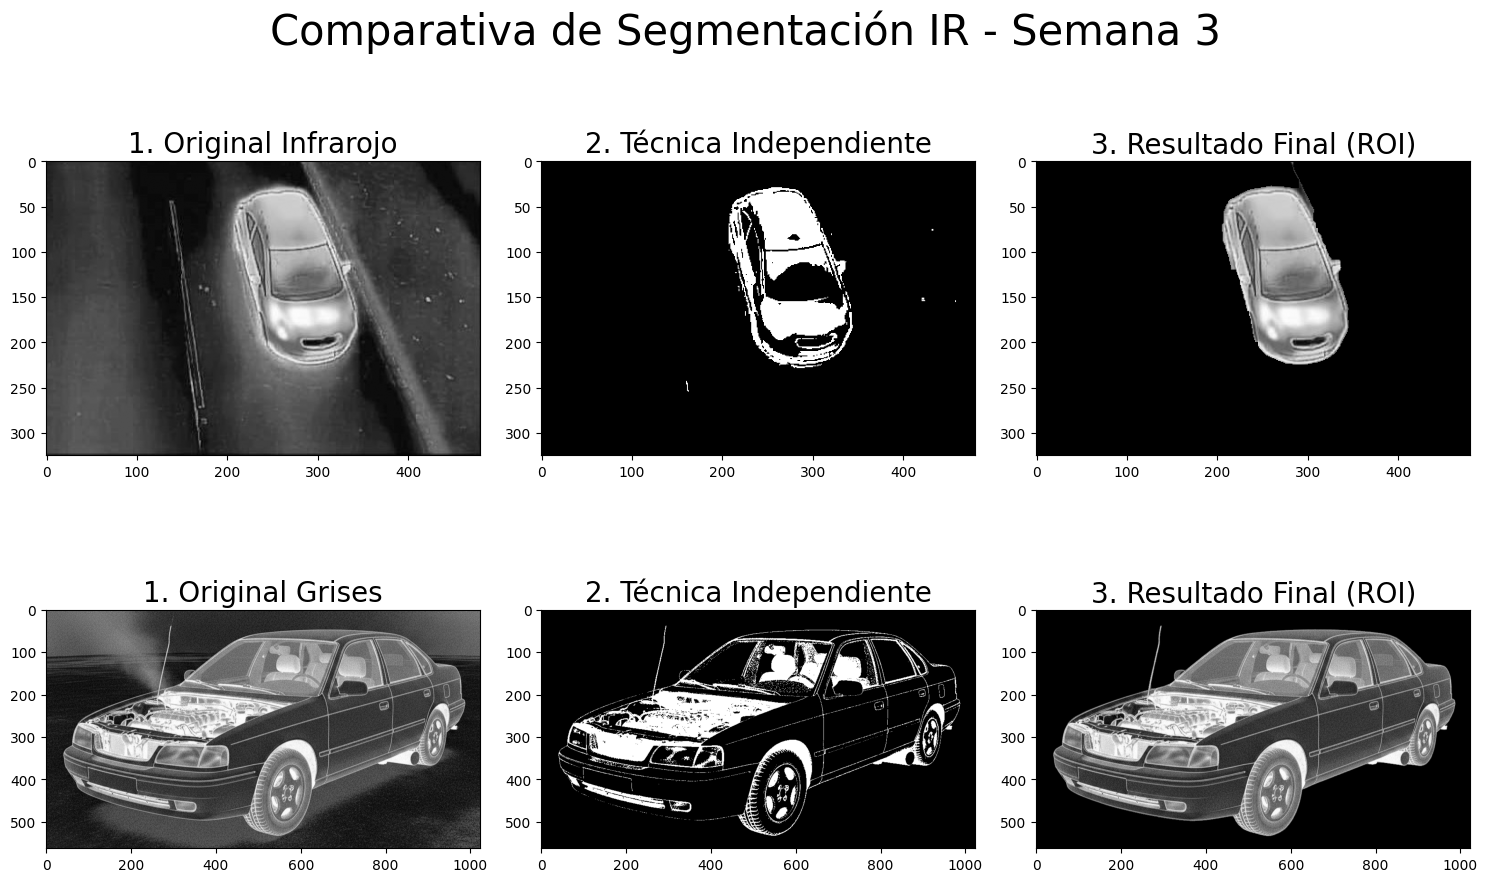

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. CARGAR LAS IMÁGENES

img_ir = cv2.imread('Infrarojo.jpg', cv2.IMREAD_GRAYSCALE)
img_grises = cv2.imread('Carro.jpg', cv2.IMREAD_GRAYSCALE)

def procesar_imagen(imagen, nombre_titulo):
    # TECNICA 1: INDEPENDIENTE 
    # Sin filtros previos, lo que suele incluir ruido
    _, mask_indep = cv2.threshold(imagen, 150, 255, cv2.THRESH_BINARY)
    
    # TECNICA 2: SECUENCIAL (El método correcto)
    # PASO A: Filtro Gaussiano para suavizar y eliminar ruido
    blur = cv2.GaussianBlur(imagen, (7, 7), 0)
    
    # PASO B: Detección de bordes (Canny)
    edges = cv2.Canny(blur, 50, 150)
    
    # PASO C: Morfología Matemática (Cierre)
    kernel = np.ones((9, 9), np.uint8)
    mask_seq = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # RELLENADO: Crear la máscara final basada en el contorno más grande
    contornos, _ = cv2.findContours(mask_seq, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask_final = np.zeros_like(imagen)
    if contornos:
        c_max = max(contornos, key=cv2.contourArea)
        cv2.drawContours(mask_final, [c_max], -1, 255, thickness=cv2.FILLED)
    
    # APLICACIÓN AL TESTSET 
    resultado = np.where(mask_final == 0, 0, imagen)
    
    return mask_indep, mask_final, resultado


# Procesamos ambas imágenes
mask_ind_ir, mask_seq_ir, res_ir = procesar_imagen(img_ir, "Infrarojo")
mask_ind_gr, mask_seq_gr, res_gr = procesar_imagen(img_grises, "Grises")

# VISUALIZACIÓN DE RESULTADOS
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle("Comparativa de Segmentación IR - Semana 3", fontsize=30)
# Fila 1: Imagen Infraroja 
axs[0, 0].imshow(img_ir, cmap='gray'), axs[0, 0].set_title("1. Original Infrarojo", fontsize=20)
axs[0, 1].imshow(mask_ind_ir, cmap='gray'), axs[0, 1].set_title("2. Técnica Independiente", fontsize=20)
axs[0, 2].imshow(res_ir, cmap='gray'), axs[0, 2].set_title("3. Resultado Final (ROI)", fontsize=20)

# Fila 2: Imagen de Grises (Auto motor expuesto)
axs[1, 0].imshow(img_grises, cmap='gray'), axs[1, 0].set_title("1. Original Grises", fontsize=20)
axs[1, 1].imshow(mask_ind_gr, cmap='gray'), axs[1, 1].set_title("2. Técnica Independiente", fontsize=20)
axs[1, 2].imshow(res_gr, cmap='gray'), axs[1, 2].set_title("3. Resultado Final (ROI)", fontsize=20)

plt.tight_layout() # <-- ¡No olvides esta línea!
plt.show()